# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Name: Royan Sabila Rosyad Wahyudi
- Email: royan230603@gmail.com
- Username: royanrosyad85
- University: UIN Syarif Hidayatullah Jakarta

In [3]:
# Import library
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import joblib
from sqlalchemy import create_engine

# Mengatur tampilan plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

## Data Loading

In [4]:
# Load data
df = pd.read_csv("/content/employee_data.csv")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

Berikut adalah penjelasan singkat mengenai masing-masing fitur pada dataset:

* **EmployeeId** - ID unik karyawan
* **Attrition** - Status keluar/tidaknya karyawan (0=tidak, 1=ya)
* **Age** - Usia karyawan
* **BusinessTravel** - Frekuensi perjalanan dinas
* **DailyRate** - Gaji harian
* **Department** - Departemen tempat bekerja
* **DistanceFromHome** - Jarak rumah ke kantor (km)
* **Education** - Tingkat pendidikan (1=SMA ke bawah, 2=Kuliah, 3=S1, 4=S2, 5=S3)
* **EducationField** - Bidang pendidikan
* **EnvironmentSatisfaction** - Kepuasan lingkungan kerja (1=Rendah, 2=Sedang, 3=Tinggi, 4=Sangat Tinggi)
* **Gender** - Jenis kelamin karyawan
* **HourlyRate** - Gaji per jam
* **JobInvolvement** - Tingkat keterlibatan kerja (1=Rendah, 2=Sedang, 3=Tinggi, 4=Sangat Tinggi)
* **JobLevel** - Level pekerjaan (1 sampai 5)
* **JobRole** - Jabatan karyawan
* **JobSatisfaction** - Kepuasan kerja (1=Rendah, 2=Sedang, 3=Tinggi, 4=Sangat Tinggi)
* **MaritalStatus** - Status pernikahan
* **MonthlyIncome** - Gaji bulanan
* **MonthlyRate** - Gaji bulanan (rate)
* **NumCompaniesWorked** - Jumlah perusahaan yang pernah ditempati
* **Over18** - Apakah usia di atas 18 tahun?
* **OverTime** - Lembur atau tidak
* **PercentSalaryHike** - Persentase kenaikan gaji tahun lalu
* **PerformanceRating** - Penilaian kinerja (1=Rendah, 2=Baik, 3=Bagus, 4=Sangat Bagus)
* **RelationshipSatisfaction** - Kepuasan hubungan kerja (1=Rendah, 2=Sedang, 3=Tinggi, 4=Sangat Tinggi)
* **StandardHours** - Jam kerja standar
* **StockOptionLevel** - Level opsi saham
* **TotalWorkingYears** - Total tahun bekerja
* **TrainingTimesLastYear** - Jumlah pelatihan tahun lalu
* **WorkLifeBalance** - Keseimbangan kerja-hidup (1=Rendah, 2=Baik, 3=Bagus, 4=Sangat Bagus)
* **YearsAtCompany** - Lama bekerja di perusahaan saat ini
* **YearsInCurrentRole** - Lama di posisi saat ini
* **YearsSinceLastPromotion** - Lama sejak promosi terakhir
* **YearsWithCurrManager** - Lama bekerja dengan manajer saat ini

In [5]:
# Melihat informasi dataset
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   in

In [6]:
print("Statistik Deskriptif:")
desc = df.describe().T
display(desc.T)

Statistik Deskriptif:


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Handle Missing Value

In [7]:
# Cek missing value
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Jumlah Nilai Hilang': missing_values,
    'Persentase (%)': missing_percentage
})

missing_data[missing_data['Jumlah Nilai Hilang'] > 0]

,Jumlah Nilai Hilang,Persentase (%)
Attrition,412,28.027211


In [8]:
df.dropna(inplace=True)

In [9]:
mainPath = "/content"

# Export the DataFrame
df.to_csv(os.path.join(mainPath, "clean_employee_data.csv"), index=False)


In [ ]:
from sqlalchemy import create_engine

URL = "host_URL"

engine = create_engine(URL)
df.to_sql('PT.JJM', engine)


### Bivariate Analysis

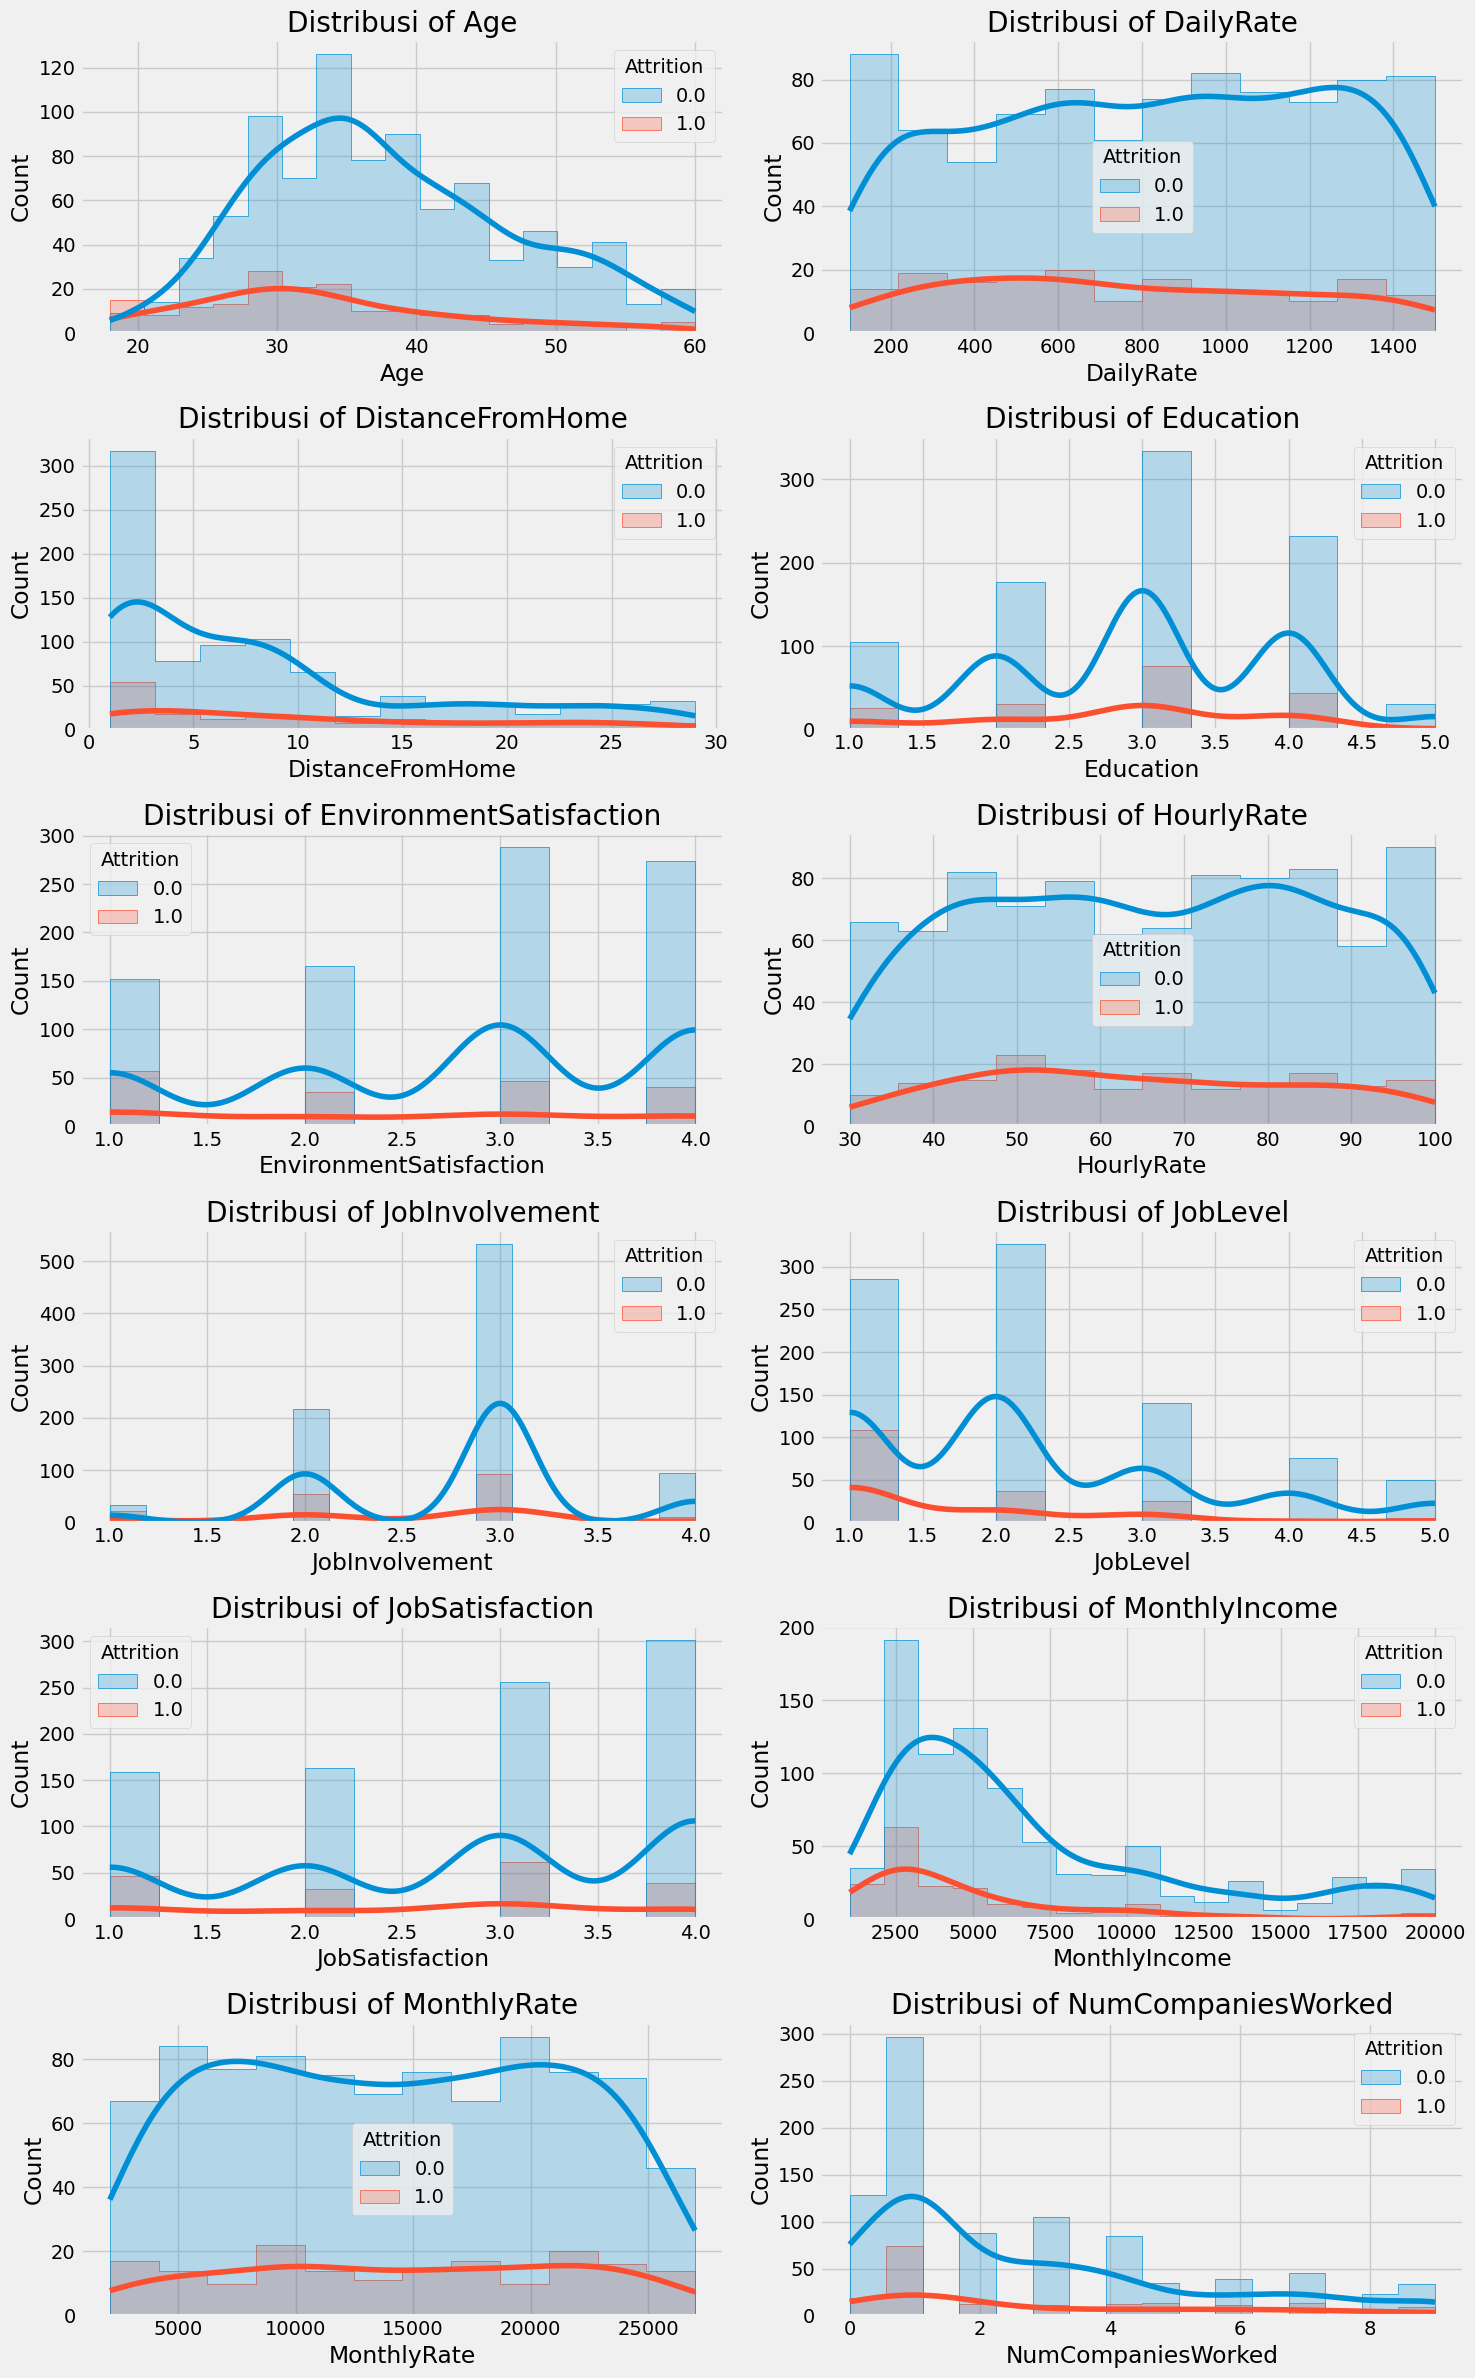

In [11]:
# Analisis fitur numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col !='Attrition' and col !='EmployeeId']

numerical_features_plot = [col for col in numerical_features if df[col].nunique()>1]

# Visualisasi distribusi fitur numerik
plt.figure(figsize=(15, 24))
for i, feature in enumerate(numerical_features_plot[:12]):
  plt.subplot(6, 2, i+1)
  sns.histplot(data=df, x=feature, hue='Attrition', kde=True, element='step', common_norm=False)
  plt.title(f'Distribusi of {feature}')

plt.tight_layout()
plt.show()



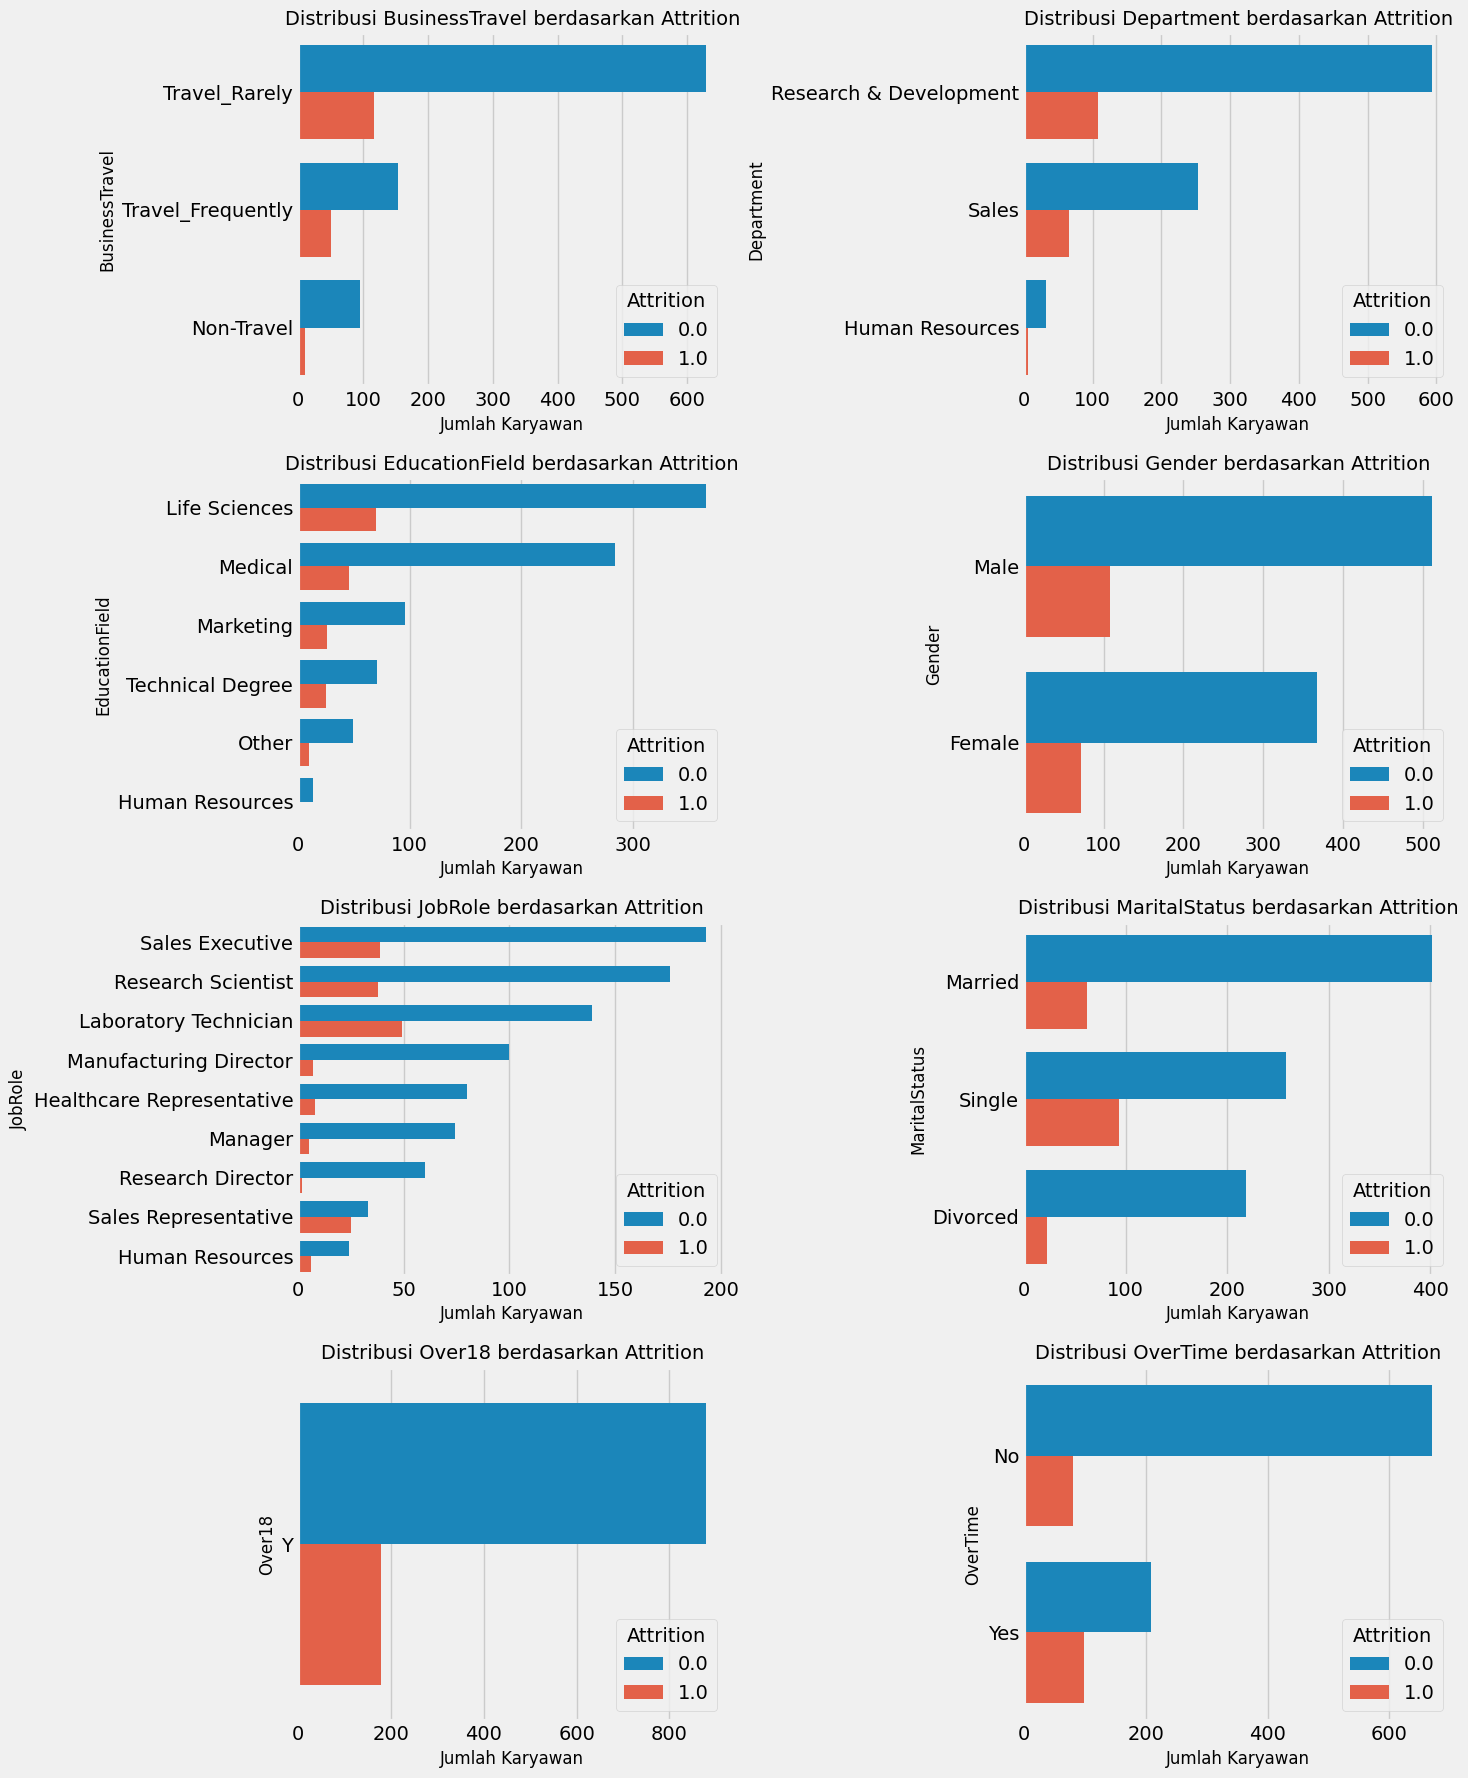

In [12]:
# Analisis fitur kategorikal
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_features if col != 'EmployeeId']

# Visualisasi distribusi fitur kategorikal sebagai row chart
plt.figure(figsize=(15, 18))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i+1)

    order = df[feature].value_counts().index

    sns.countplot(data=df, y=feature, order=order, hue='Attrition')
    plt.title(f'Distribusi {feature} berdasarkan Attrition', fontsize=14)
    plt.xlabel('Jumlah Karyawan', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.legend(title='Attrition', loc='lower right')
plt.tight_layout()
plt.show()

## Data Preparation

### Encoding Fitur Kategorikal

In [13]:
# Definisi fitur kategorikal dan numerik
categorical_features = [col for col in df.select_dtypes(include=['object']).columns
                       if col not in ['EmployeeId']]
numerical_features = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                     if col not in ['EmployeeId', 'Attrition']]

print("Fitur Kategorikal:")
print(categorical_features)
print("\nFitur Numerik:")
print(numerical_features)

Fitur Kategorikal:
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Fitur Numerik:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [14]:
# Memeriksa nilai unik dari fitur kategorikal
for feature in categorical_features:
    print(f"\n{feature} memiliki {df[feature].nunique()} nilai unik:")
    print(df[feature].value_counts())


BusinessTravel memiliki 3 nilai unik:
BusinessTravel
Travel_Rarely        746
Travel_Frequently    205
Non-Travel           107
Name: count, dtype: int64

Department memiliki 3 nilai unik:
Department
Research & Development    701
Sales                     319
Human Resources            38
Name: count, dtype: int64

EducationField memiliki 6 nilai unik:
EducationField
Life Sciences       436
Medical             330
Marketing           122
Technical Degree     96
Other                59
Human Resources      15
Name: count, dtype: int64

Gender memiliki 2 nilai unik:
Gender
Male      620
Female    438
Name: count, dtype: int64

JobRole memiliki 9 nilai unik:
JobRole
Sales Executive              232
Research Scientist           214
Laboratory Technician        188
Manufacturing Director       107
Healthcare Representative     88
Manager                       79
Research Director             62
Sales Representative          58
Human Resources               30
Name: count, dtype: int64

Mar

In [15]:
# Membuat copy dataframe untuk preprocessing
df_processed = df.copy()

# Encoding fitur kategorikal menggunakan one-hot encoding
df_encoded = pd.get_dummies(df_processed, columns=categorical_features, drop_first=True)

print(f"Jumlah kolom sebelum encoding: {df.shape[1]}")
print(f"Jumlah kolom setelah encoding: {df_encoded.shape[1]}")

# Melihat hasil encoding
df_encoded.head()

Jumlah kolom sebelum encoding: 35
Jumlah kolom setelah encoding: 48


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1,2,37,1.0,1141,11,2,1,1,61,1,...,False,False,False,False,False,False,False,True,False,False
2,3,51,1.0,1323,4,4,1,1,34,3,...,False,False,False,False,True,False,False,True,False,True
3,4,42,0.0,555,26,3,1,3,77,3,...,False,False,False,False,False,True,False,True,False,False
6,7,40,0.0,1124,1,2,1,2,57,1,...,False,False,False,False,False,True,False,True,False,True
7,8,55,1.0,725,2,3,1,4,78,3,...,False,True,False,False,False,False,False,True,False,True


### Normalisasi / Standarisasi Fitur Numerik

In [16]:
# Memisahkan fitur dan target
X = df_encoded.drop(['EmployeeId', 'Attrition'], axis=1)
y = df_encoded['Attrition']

# Standarisasi fitur numerik
scaler = StandardScaler()
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['EmployeeId', 'Attrition']]

X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Melihat hasil standarisasi
X_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1,-0.005929,0.811829,0.251560,-0.852624,0.0,-1.567739,-0.228580,-2.466281,-0.079876,-0.679152,...,False,False,False,False,False,False,False,True,False,False
2,1.482487,1.257596,-0.619433,1.087325,0.0,-1.567739,-1.557631,0.373028,-0.960176,0.226955,...,False,False,False,False,True,False,False,True,False,True
3,0.525648,-0.623443,2.117973,0.117350,0.0,0.263020,0.559005,0.373028,1.680723,-0.679152,...,False,False,False,False,False,True,False,True,False,False
6,0.313018,0.770191,-0.992715,-0.852624,0.0,-0.652359,-0.425477,-2.466281,-0.079876,1.133062,...,False,False,False,False,False,True,False,True,False,True
7,1.907749,-0.207067,-0.868288,0.117350,0.0,1.178400,0.608229,0.373028,2.561023,-1.585259,...,False,True,False,False,False,False,False,True,False,True


# Memeriksa nilai unik dari fitur kategorikal
for feature in categorical_features:
    print(f"\n{feature} memiliki {df[feature].nunique()} nilai unik:")
    print(df[feature].value_counts())

In [17]:
# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Modeling

In [18]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluasi model
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Model:
Accuracy: 0.8773584905660378
AUC-ROC Score: 0.8278093434343434

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       176
         1.0       0.71      0.47      0.57        36

    accuracy                           0.88       212
   macro avg       0.80      0.72      0.75       212
weighted avg       0.87      0.88      0.87       212



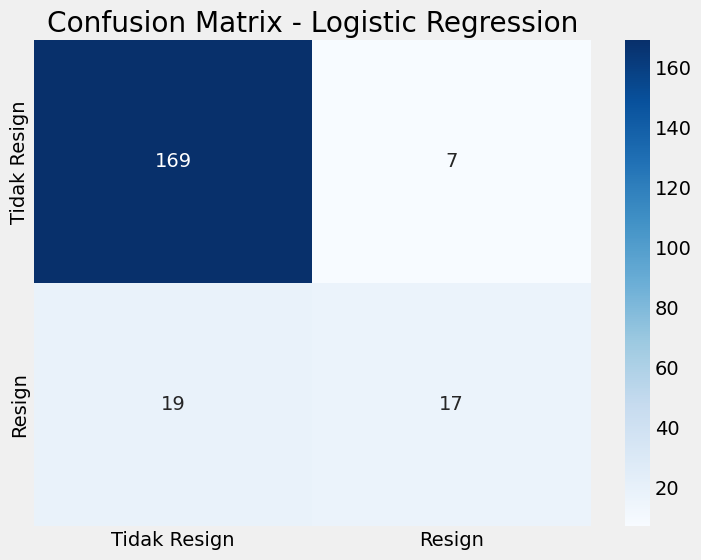

In [19]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Tidak Resign', 'Resign'], yticklabels=['Tidak Resign', 'Resign'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Random Forest Model
Accuracy: 0.8490566037735849
ROC Score: 0.8259943181818182

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       176
         1.0       0.83      0.14      0.24        36

    accuracy                           0.85       212
   macro avg       0.84      0.57      0.58       212
weighted avg       0.85      0.85      0.80       212



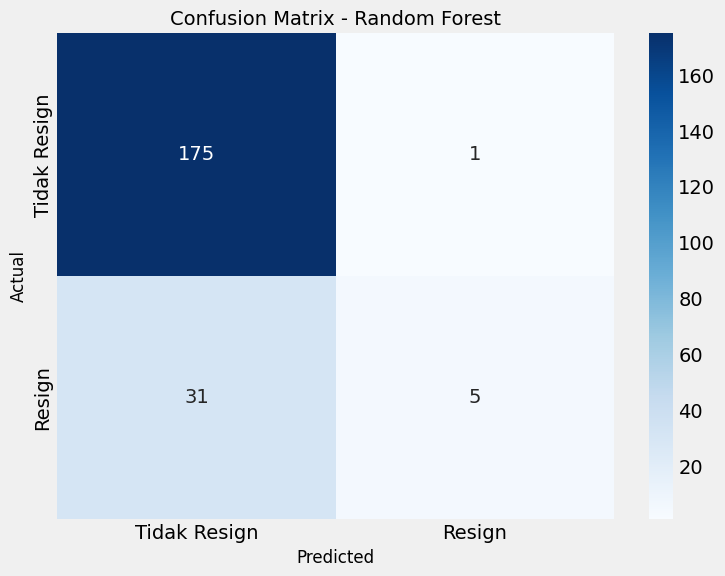

In [20]:
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluasi model
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC Score:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Tidak Resign', 'Resign'], yticklabels=['Tidak Resign', 'Resign'])
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

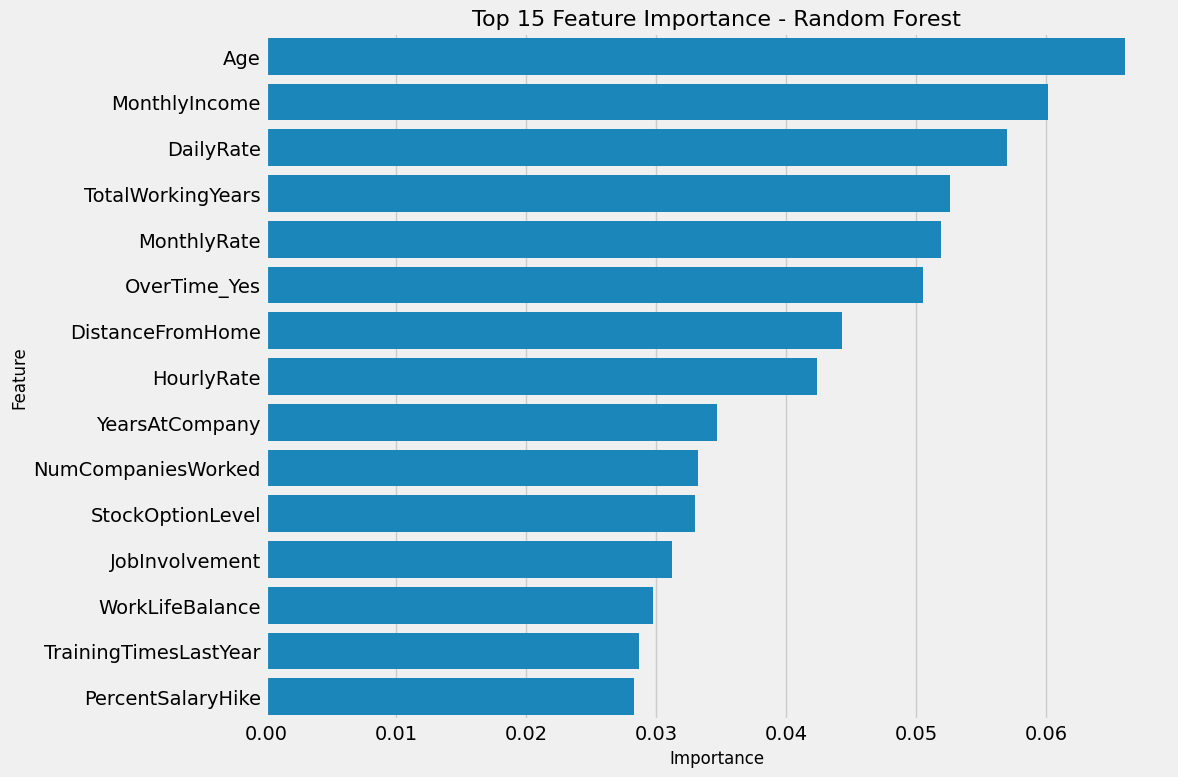

In [21]:
# Menganalisis fitur penting dari model Random Forest
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Menampilkan 15 fitur teratas
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15))
plt.title('Top 15 Feature Importance - Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

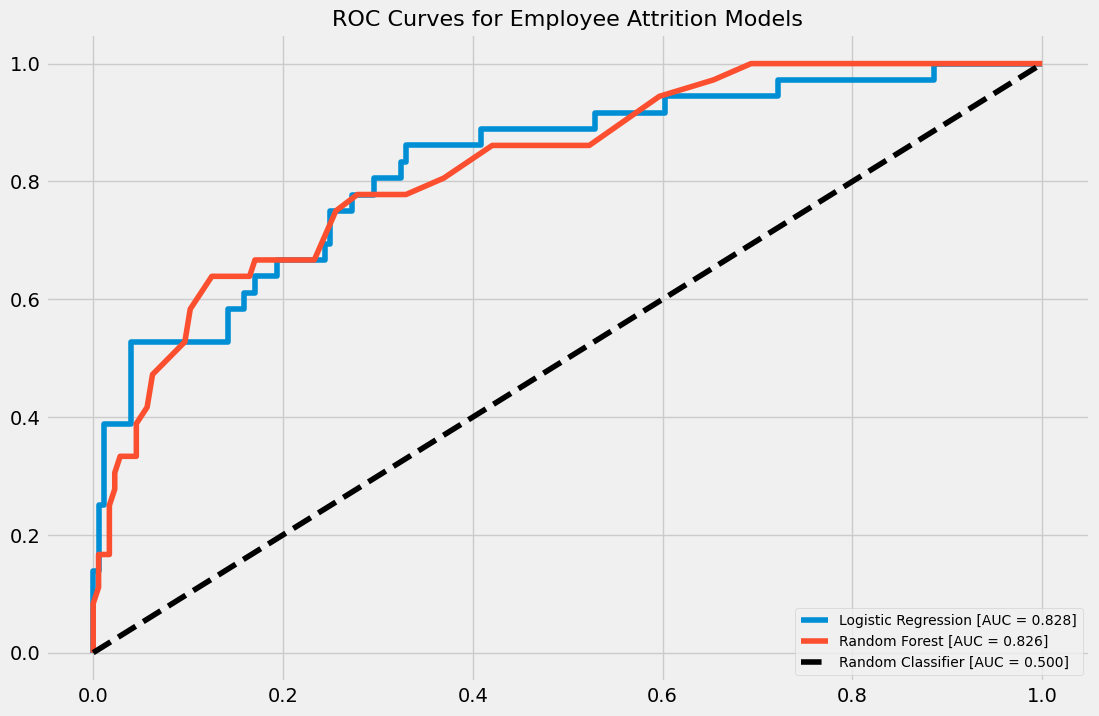

In [22]:
# Plotting ROC Curve untuk semua model
plt.figure(figsize=(12, 8))

# ROC untuk Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression [AUC = {auc_lr:.3f}]')

# ROC untuk Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest [AUC = {auc_rf:.3f}]')

# ROC untuk baseline model (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier [AUC = 0.500]')

# Plot settings
plt.title('ROC Curves for Employee Attrition Models', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.show()

In [23]:
# Membuat dataframe untuk perbandingan model
models = ['Logistic Regression', 'Random Forest']
accuracy = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
]

#Precision, Recall dan F1 untuk kelas positif (kelas 1 - karyawan resign)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = [
    precision_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_rf)
]
recall = [
    recall_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_rf)
]
f1 = [
    f1_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_rf)
]
auc = [auc_lr, auc_rf]

# Membuat dataframe perbandingan
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC-ROC': auc
})

# Format nilai ke persentase
format_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
for col in format_cols:
    comparison_df[col] = comparison_df[col].map(lambda x: f'{x:.3f}')

# Menampilkan tabel perbandingan
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.877,0.708,0.472,0.567,0.828
1,Random Forest,0.849,0.833,0.139,0.238,0.826


In [24]:
model_dir = "/content/models"
os.makedirs(model_dir, exist_ok=True)

# Menyimpan model Logistic Regression
joblib.dump(lr_model, os.path.join(model_dir, "logistic_regression_model.pkl"))

# Menyimpan model Random Forest
joblib.dump(rf_model, os.path.join(model_dir, "random_forest_model.pkl"))

joblib.dump(scaler, os.path.join(model_dir, "scaler.pkl"))
print("Model berhasil disimpan di folder:", model_dir)

Model berhasil disimpan di folder: /content/models


In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

In [26]:
# !pipreqs "/content/drive/MyDrive/Submission Dicoding/Applied Data Science" --scan-notebooks